**Q 7_1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('Q7-Part1.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X = data.iloc[:, 1].values  # Job position level
y = data.iloc[:, 2].values  # Income

In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X.reshape(-1, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
X_test

array([[0.88888889],
       [0.11111111]])

Accuracy (Train) - Kernel: RBF: 0.93
Accuracy (Validation) - Kernel: RBF: 0.61

Predicted values on test data (Kernel: RBF):
[680701.26773698 134122.7898161 ]



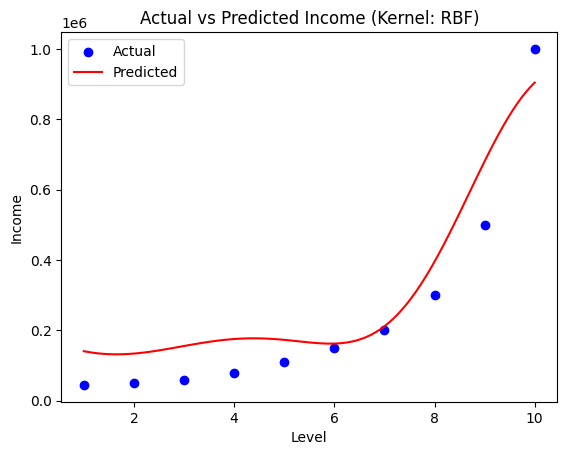

Accuracy (Train) - Kernel: Linear: 0.50
Accuracy (Validation) - Kernel: Linear: 0.88

Predicted values on test data (Kernel: Linear):
[388401.20417413  58277.74738401]



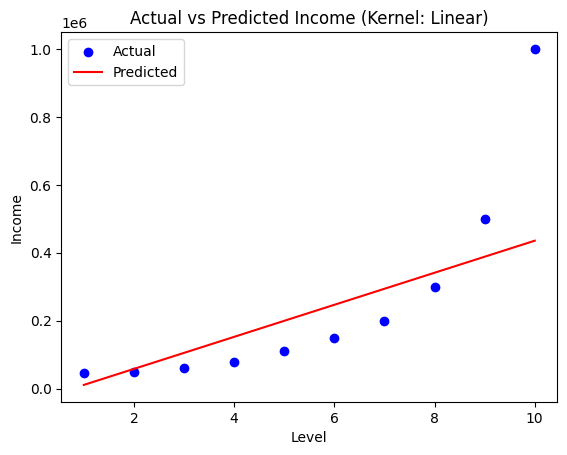

Accuracy (Train) - Kernel: Polynomial: 0.93
Accuracy (Validation) - Kernel: Polynomial: 0.77

Predicted values on test data (Kernel: Polynomial):
[621633.32357014 -44698.70915763]



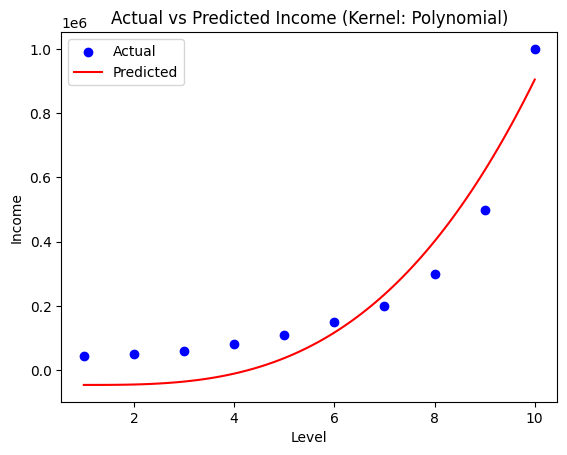

In [ ]:
kernels = ['rbf', 'linear', 'poly']
kernel_names = ['RBF', 'Linear', 'Polynomial']

for kernel, kernel_name in zip(kernels, kernel_names):
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train.ravel())
    
    # Calculate accuracy on train and validation sets
    y_train_pred = svr.predict(X_train)
    y_val_pred = svr.predict(X_test)
    
    train_accuracy = r2_score(y_train, y_train_pred)
    val_accuracy = r2_score(y_test, y_val_pred)
    
    print(f'Accuracy (Train) - Kernel: {kernel_name}: {train_accuracy:.2f}')
    print(f'Accuracy (Validation) - Kernel: {kernel_name}: {val_accuracy:.2f}\n')
    
    # Print predicted values on test data (in original scale)
    y_test_pred = svr.predict(X_test)
    y_test_pred = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))
    print(f'Predicted values on test data (Kernel: {kernel_name}):\n{y_test_pred.flatten()}\n')
    
    # Plot predicted and actual values for the entire dataset (in original scale)
    X_actual = scaler_X.inverse_transform(X_scaled)
    y_actual = scaler_y.inverse_transform(y_scaled)
    
    X_plot = np.linspace(min(X_actual), max(X_actual), num=100).reshape(-1, 1)
    y_pred_plot = svr.predict(scaler_X.transform(X_plot))
    y_pred_plot = scaler_y.inverse_transform(y_pred_plot.reshape(-1, 1))
    
    plt.scatter(X_actual, y_actual, color='blue', label='Actual')
    plt.plot(X_plot, y_pred_plot, color='red', label='Predicted')
    plt.title(f'Actual vs Predicted Income (Kernel: {kernel_name})')
    plt.xlabel('Level')
    plt.ylabel('Income')
    plt.legend()
    plt.show()

**Q 7_2**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

In [3]:
# Load data from H1.csv and H2.csv
train_data = pd.read_csv("H1.csv")
test_data = pd.read_csv("H2.csv")


In [4]:
# # Drop rows with missing values
# train_data = train_data.dropna()
# test_data = test_data.dropna()

In [5]:
# Separate features and target variable
X_train = train_data.drop("ADR", axis=1)
y_train = train_data["ADR"]

X_test = test_data.drop("ADR", axis=1)
y_test = test_data["ADR"]

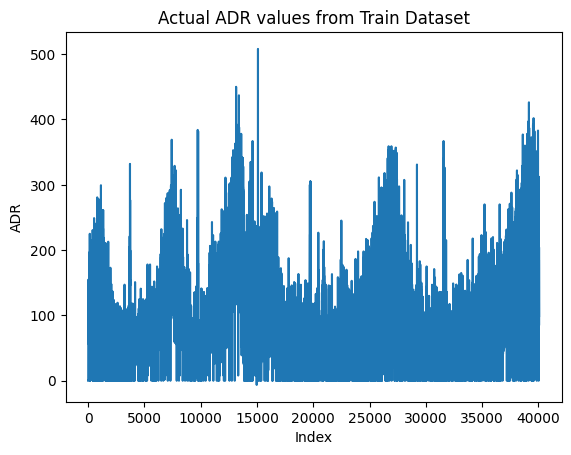

In [6]:
# Create a plot of y_train against the index values
plt.plot(y_train.index, y_train.values)
plt.xlabel('Index')
plt.ylabel('ADR')
plt.title('Actual ADR values from Train Dataset')
plt.show()

In [7]:
# Normalize numerical features
scaler = MinMaxScaler()
numerical_cols = ["LeadTime", "ArrivalDateYear", "ArrivalDateWeekNumber", "ArrivalDateDayOfMonth", "StaysInWeekendNights",
                  "StaysInWeekNights", "Adults", "Children", "Babies", "PreviousCancellations", "PreviousBookingsNotCanceled",
                  "BookingChanges", "DaysInWaitingList", "RequiredCarParkingSpaces", "TotalOfSpecialRequests"]
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Encode categorical features
categorical_cols = ["ArrivalDateMonth", "Meal", "Country", "MarketSegment", "DistributionChannel", "ReservedRoomType",
                    "AssignedRoomType", "DepositType", "CustomerType"]

# Convert categorical features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# Get one-hot encoded feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Convert encoded features to DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

# Concatenate encoded features with remaining numerical features
X_train_processed = pd.concat([X_train_encoded_df, X_train[numerical_cols]], axis=1)
X_test_processed = pd.concat([X_test_encoded_df, X_test[numerical_cols]], axis=1)

In [9]:
# Normalize target variable
target_scaler = MinMaxScaler()
y_train_normalized = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = target_scaler.transform(y_test.values.reshape(-1, 1))

In [10]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_processed = pd.DataFrame(imputer.fit_transform(X_train_processed), columns=X_train_processed.columns)
X_test_processed = pd.DataFrame(imputer.transform(X_test_processed), columns=X_test_processed.columns)

In [11]:
# SVR model training
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_processed, y_train_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [12]:
# Make predictions on test data
y_pred = svm_model.predict(X_test_processed)

# Evaluation metrics
mse = mean_squared_error(y_test_normalized, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.013236709160265817


In [13]:
# Convert predictions to array
y_pred = np.array(y_pred)
y_test_normalized = np.array(y_test_normalized)

In [14]:
y_pred_actual = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = target_scaler.inverse_transform(y_test_normalized.reshape(-1, 1))

In [15]:
# Compute the absolute difference
absolute_difference = abs(y_pred_actual.flatten() - y_test_actual.flatten())

In [16]:
# Create a DataFrame with the actual values, absolute difference, and signed difference
df = pd.DataFrame({'y_pred_actual': y_pred_actual.flatten(),
                   'y_test_actual': y_test_actual.flatten(),
                   'absolute_difference': absolute_difference})

# Save the DataFrame to a CSV file
df.to_csv('actual_values_and_absolute_difference.csv', index=False)